# Document Clustering


## 1 - Library Imports

In [1]:
%reset -f
# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

##########################
# Import other libraries
##########################

# Data Manipulation
import numpy as np
import re
import pandas as pd

from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from itertools import cycle

# Natural Language Processing
import nltk 
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.snowball import SnowballStemmer

import time

# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AffinityPropagation
from sklearn.neighbors import KDTree;



# Import k-means to perform clusters
from sklearn.cluster import KMeans

from gensim.models import word2vec


import warnings
warnings.filterwarnings("ignore")

KeyboardInterrupt: 

In [100]:
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from '/Users/sgupta/Downloads/datascience_project-master/libraries/corpus.py'>

## 2 - Data Preprocessing

In [101]:
# Get the Dataset from the White-Paper folders, converting all PDFs into text
dataset = pdf2text.get_dataset()

In [102]:
# Name of all the White Papers in our dataset
dataset.keys()

dict_keys(['ample!', 'utrust', 'ark', 'bitcoin', '0chain', 'opmarket', 'acrecoin', 'icon', 'basicattentiontoken', 'dash', 'bytecoin', 'adhive', 'horizen', 'abbccoin', 'abcccoin', 'komodo', 'able', 'beam', 'bitstash', 'hyperion', 'tezos', 'nexo', 'dai', 'sdusd', 'civictokensale', 'tron', 'kwattcoin', 'fantom', 'digixdao', 'givecoin', '1x2coin', 'cryptonex', 'maker', 'bytom', 'metal', 'dogecoin', 'pundix', 'oxcert', '1world', 'japancontenttoken', 'snipcoin', 'ultrain', 'adbank', 'cosmos', 'latoken', 'nem', 'maidsafecoin', 'opbusiness', 'decentraland', 'mixin', 'aditus', 'stellar', 'elastos', 'gxchain', 'nebulas', 'eidoo', 'solve', 'eos', 'theta', 'adshares', 'cryptonote', 'adcoin', 'stratis', 'tether', 'orbs', 'etherace', 'iexec', 'bitcoindiamond', 'dent', 'zerocash', 'ethereum', 'ace', 'vechain', 'hypercash', 'bitcoingold', 'status', 'ravencoin', 'thetafuel', 'zilliqa', 'celernetwork', 'omisego', 'monerov', 'singularitynet', 'budbo', 'usdcoin', 'actinium', 'holo', 'giant', 'bitshares', 

In [103]:
# Number of White Papers in our dataset
len(dataset.keys())

143

In [104]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=False)

[nltk_data] Downloading package punkt to /Users/sgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sgupta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/sgupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: ample!
Cleaning: utrust
Cleaning: ark
Cleaning: bitcoin
Cleaning: 0chain
Cleaning: opmarket
Cleaning: acrecoin
Cleaning: icon
Cleaning: basicattentiontoken
Cleaning: dash
Cleaning: bytecoin
Cleaning: adhive
Cleaning: horizen
Cleaning: abbccoin
Cleaning: abcccoin
Cleaning: komodo
Cleaning: able
Cleaning: beam
Cleaning: bitstash
Cleaning: hyperion
Cleaning: tezos
Cleaning: nexo
Cleaning: dai
Cleaning: sdusd
Cleaning: civictokensale
Cleaning: tron
Cleaning: kwattcoin
Cleaning: fantom
Cleaning: digixdao
Cleaning: givecoin
Cleaning: 1x2coin
Cleaning: cryptonex
Cleaning: maker
Cleaning: bytom
Cleaning: metal
Cleaning: dogecoin
Cleaning: pundix
Cleaning: oxcert
Cleaning: 1world
Cleaning: japancontenttoken
Cleaning: snipcoin
Cleaning: ultrain
Cleaning: adbank
Cleaning: cosmos
Cleaning: latoken
Cleaning: nem
Cleaning: maidsafecoin
Cleaning: opbusiness
Cleaning: decentraland
Cleaning: mixin
Cleaning: aditus
Cleaning: stellar
Cleaning: elastos
Cleaning: gxchain
Cleaning: nebulas
Cleanin

In [105]:
# All the White Papers pre-processed
corpora.keys()

dict_keys(['ample!', 'utrust', 'ark', 'bitcoin', '0chain', 'opmarket', 'acrecoin', 'icon', 'basicattentiontoken', 'dash', 'bytecoin', 'adhive', 'horizen', 'abbccoin', 'abcccoin', 'komodo', 'able', 'beam', 'bitstash', 'hyperion', 'tezos', 'nexo', 'dai', 'sdusd', 'civictokensale', 'tron', 'kwattcoin', 'fantom', 'digixdao', 'givecoin', '1x2coin', 'cryptonex', 'maker', 'bytom', 'metal', 'dogecoin', 'pundix', 'oxcert', '1world', 'japancontenttoken', 'snipcoin', 'ultrain', 'adbank', 'cosmos', 'latoken', 'nem', 'maidsafecoin', 'opbusiness', 'decentraland', 'mixin', 'aditus', 'stellar', 'elastos', 'gxchain', 'nebulas', 'eidoo', 'solve', 'eos', 'theta', 'adshares', 'cryptonote', 'adcoin', 'stratis', 'tether', 'orbs', 'etherace', 'iexec', 'bitcoindiamond', 'dent', 'zerocash', 'ethereum', 'ace', 'vechain', 'hypercash', 'bitcoingold', 'status', 'ravencoin', 'thetafuel', 'zilliqa', 'celernetwork', 'omisego', 'monerov', 'singularitynet', 'budbo', 'usdcoin', 'actinium', 'holo', 'giant', 'bitshares', 

In [106]:
# Function that converts a dictionary into a Pandas Dataframe
# The indexes are the name of the files
df = corpus.dictionaryToPandas(corpora)

In [107]:
# Define to show all the data
pd.set_option('display.max_colwidth', 100)
# Inspect the DataFrame
df.head()

,text
ample!,amplewpen ico process white paper ample group promoting cosplayer professionalism last updated v...
utrust,utrust future online payments utrustio version october table contents preamble executive summary...
ark,ark ecosystem google docs ark ecosystem version april ark ecosystem google docs ark ecosystem ab...
bitcoin,bitcoin peertopeer electronic cash system satoshi nakamoto satoshingmxcom abstract purely peerto...
0chain,chain chain fast secure scalable free blockchain tailored highperformance zerotrust decentralize...


In [108]:
# Tokenize a paragraph into sentences and store in sent_tokenized
df['sents_tokenized'] = df.apply(lambda row: nltk.sent_tokenize(row['text']), axis = 1)

# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
df['words_tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis = 1)

#print(df['words_tokenized'])

df['filtered'] = df.apply(lambda row: [word for word in row['words_tokenized'] if re.search('[a-zA-Z]', word)], axis = 1)

# Display filtered words to observe words after tokenization
print(df.filtered)

ample!                     [amplewpen, ico, process, white, paper, ample, group, promoting, cosplayer, professionalism, las...
utrust                     [utrust, future, online, payments, utrustio, version, october, table, contents, preamble, execut...
ark                        [ark, ecosystem, google, docs, ark, ecosystem, version, april, ark, ecosystem, google, docs, ark...
bitcoin                    [bitcoin, peertopeer, electronic, cash, system, satoshi, nakamoto, satoshingmxcom, abstract, pur...
0chain                     [chain, chain, fast, secure, scalable, free, blockchain, tailored, highperformance, zerotrust, d...
opmarket                   [hello, world, publishers, curators, network, servicesmarketplace, economics, publisher, alice, ...
acrecoin                   [brief, note, acre, coin, team, seeks, revolutionary, project, introduction, general, market, ob...
icon                       [hyperconnect, world, version, draft, english, last, updated, aug, icon, foundation,

In [109]:
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

# Stem the words from filtered and store in stemmed_words
df['stemmed_words'] = df.apply(lambda row: [stemmer.stem(word) for word in row['filtered']], axis = 1)

# Print the stemmed_words to observe words after stemming
#print("After stemming:   ", df[])

In [110]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for text in nltk.sent_tokenize(text) for word in nltk.word_tokenize(text)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = []
    for token in filtered_tokens:
         stems.append(stemmer.stem(token))

    return stems

words_stemmed = tokenize_and_stem('')
print(words_stemmed)

[]


In [111]:
# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_features=20000,
                                        stop_words='english', lowercase = True,
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [112]:
# Fit and transform the tfidf_vectorizer with the "text" of each paper
# to create a vector representation of the plot summaries
tfidf_matrix = tfidf_vectorizer.fit_transform(corpora.values())

print(type(tfidf_matrix))


<class 'scipy.sparse.csr.csr_matrix'>


In [114]:
matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names(),index=corpora.keys())
matrix.head(10)

,aac,aac reward,ab,abandon,abbc,abbc coin,abbc foundat,abbrevi,abc,abcc,...,zksnark proof,zksnark statement,zkspend,zohar,zone,zone cosmos,zone hub,zooko,zxc,zxc token
ample!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
utrust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
ark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
bitcoin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
0chain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00705,0.0,0.0,0.0,0.0,0.0
opmarket,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
acrecoin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
icon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
basicattentiontoken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
dash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


## 3 - Methods Application

### K Means Clustering

[3 3 4 2 2 4 1 4 3 1 2 3 4 3 4 2 3 4 4 3 2 4 3 4 3 0 4 2 4 2 1 4 3 4 4 2 3
 4 4 3 3 4 4 2 4 2 4 4 3 2 3 2 4 4 4 3 4 2 2 3 2 4 4 4 4 3 4 4 3 2 2 3 4 4
 2 4 4 2 2 4 4 2 4 4 4 2 2 1 2 3 2 4 4 4 2 2 1 3 4 2 3 4 4 4 2 4 2 2 3 3 3
 2 4 4 3 2 2 4 4 4 3 4 4 4 2 4 2 4 4 3 2 4 3 4 4 3 3 3 4 4 2 4 2]


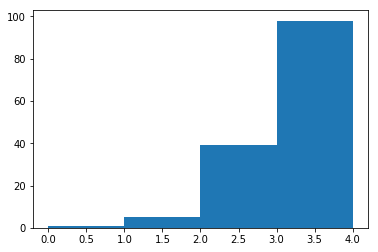

In [115]:
# Create a KMeans object with 5 clusters and save as km, init = "k-means++"
km = KMeans(n_clusters=5,max_iter=1000, init = "k-means++", random_state=0)

# Fit the k-means object with tfidf_matrix
km.fit(matrix)

clusters = km.labels_.tolist()
y_kmeans = km.predict(matrix)
print(y_kmeans)

plt.hist(km.labels_, bins=4)
plt.show()
#print(km.get_params())

# Create a column cluster to denote the generated cluster for each paper
df["cluster"] = clusters

## Display number of papers per cluster (clusters from 0 to 4)
df['cluster'].value_counts() 

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()


In [116]:
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:
        print(" %s" % terms[ind])

Cluster 0:
 trx
 tron
 trc
 bandwidth point
 tvm
Cluster 1:
 masternod
 acr
 coin
 pov
 giant
Cluster 2:
 node
 block
 transact
 network
 use
Cluster 3:
 token
 user
 platform
 market
 use
Cluster 4:
 token
 blockchain
 network
 use
 asset


In [119]:
def clean_text(all_documents):
    rslt = []
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle');
    for pos in range(len(all_documents)):
        doc_rslt = []
        # Get the comment
        doc = all_documents[pos];

        # Normalize tabs and remove newlines
        no_tabs = str(doc).replace('\t', ' ').replace('\n', '');

        # Remove all characters except A-Z and a dot.
        alphas_only = re.sub("[^a-zA-Z\.]", " ", no_tabs);

        # Normalize spaces to 1
        multi_spaces = re.sub(" +", " ", alphas_only);

        # Strip trailing and leading spaces
        no_spaces = multi_spaces.strip();

        # Normalize all charachters to lowercase
        clean_text = no_spaces.lower();

        # Get sentences from the tokenizer, remove the dot in each.
        sentences = tokenizer.tokenize(clean_text);
        sentences = [re.sub("[\.]", "", sentence) for sentence in sentences];

        # If the text has more than one space (removing single word comments) and one character, write it to the file.
        if len(clean_text) > 0 and clean_text.count(' ') > 0:
            for sentence in sentences:
                for word in sentence.split(" "):
                    doc_rslt.append(word)
                
        rslt.append(doc_rslt)
        
    return rslt

In [120]:
#COnverting into list of words
cleaned_text = clean_text(list(corpora.values()))

### Word2Vec Clustering

In [121]:
#Training Word 2 Vec Model
model = word2vec.Word2Vec(cleaned_text, workers=3, 
            size=100, min_count = 40, 
            window = 5, sample = 1e-3);

In [122]:
#Indexes to Words
words = model.wv.index2word

In [123]:
#Getting Vectors for Words
X = model.wv[words]


In [124]:
# Defining Function
def clustering_on_wordvecs(word_vectors, num_clusters):
    """
    Function that receives a word vectors and a number of clusters, and return the centers and the clusters
    
    """
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [125]:
#Clustering Word2Vec to findout related words
centers, clusters = clustering_on_wordvecs(X, 5)


In [126]:
#Average out vectors in a document
def average_word_vectors(words, model, vocabulary, num_features):
    """
    Function that receives a words, a model, a vocabulary and number of features and return averages
    
    """
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

#Process a single document 
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

w2v_feature_array = averaged_word_vectorizer(corpus=cleaned_text, model=model,
                                             num_features=100)
#pd.DataFrame(w2v_feature_array)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.419982,0.145564,-0.082706,-0.141218,0.593627,-0.154458,-0.138475,-0.394569,-0.400642,0.372429,...,-0.107964,-0.033443,0.039237,-0.066949,-0.120426,0.336883,0.315783,-0.265383,-0.064767,-0.158894
1,-0.377923,0.205478,-0.042791,-0.172018,0.557348,-0.173148,-0.186083,-0.454140,-0.397431,0.291560,...,-0.182010,-0.052445,0.074112,-0.009110,-0.066420,0.335022,0.250268,-0.205085,-0.022774,-0.229199
2,-0.306514,0.220921,-0.318980,-0.390044,0.524282,-0.190107,-0.324223,-0.502355,-0.624307,0.220476,...,0.001151,0.135842,-0.050823,0.258999,0.199453,0.441875,0.161019,-0.061802,-0.332491,-0.162033
3,0.190962,0.195240,-0.251963,-0.247849,0.455254,-0.274888,-0.487319,-0.147909,-0.428824,0.170036,...,0.135907,-0.133258,0.224665,0.437979,0.455299,0.251568,-0.176103,0.184650,-0.391661,-0.324427
4,-0.072245,0.220560,-0.233037,-0.266363,0.564763,-0.189616,-0.403768,-0.329042,-0.474936,0.260458,...,0.019368,-0.020777,-0.005493,0.327342,0.196847,0.275434,0.066306,-0.040512,-0.281062,-0.180267
5,-0.416827,0.397591,-0.208681,-0.415283,0.484505,-0.291910,-0.657129,-0.491004,-0.540356,0.054993,...,-0.147387,0.391199,0.154378,0.086256,0.106875,0.289464,0.106789,-0.333159,-0.151144,-0.270758
6,-0.287665,0.236818,-0.128035,-0.149617,0.556145,-0.183783,-0.221351,-0.390666,-0.427191,0.243891,...,-0.090949,-0.044280,0.033391,0.086459,0.027531,0.289339,0.171409,-0.109954,-0.148149,-0.228931
7,-0.171828,0.206995,-0.238189,-0.252811,0.490037,-0.205941,-0.332880,-0.377291,-0.468505,0.306369,...,0.000920,-0.026447,0.076243,0.229056,0.130572,0.402696,0.150069,-0.098422,-0.232751,-0.137827
8,-0.275894,0.239348,-0.009283,-0.172377,0.556514,-0.171670,-0.317816,-0.331526,-0.415849,0.217293,...,-0.193617,-0.027322,0.162184,0.026984,0.020611,0.235402,0.111321,-0.164364,-0.063851,-0.243238
9,0.058968,0.212590,-0.125378,-0.159540,0.476844,-0.189747,-0.421862,-0.251292,-0.432836,0.236992,...,-0.021900,-0.133287,0.163173,0.356696,0.250634,0.227933,-0.049114,0.091803,-0.305280,-0.232887


### Affinity Propagation

Now, we use Affinity Propagation as our Clustering Algorithm. This algorithm doesn't need a number of clusters.

In [149]:
# Create an
ap = AffinityPropagation()

ap.fit(w2v_feature_array)

ap_centers = ap.cluster_centers_

cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
df = df.reset_index()
rslt_df = pd.concat([df, cluster_labels], axis=1)

clus_val = rslt_df.ClusterLabel.value_counts()


Text(0, 0.5, 'No. of documents in the cluster')

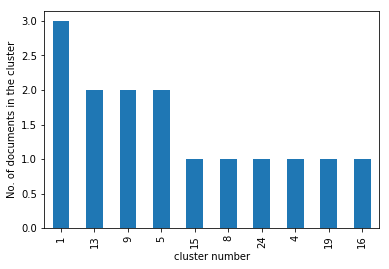

In [147]:
clus_val = rslt_df.ClusterLabel.value_counts()

pd.value_counts(clus_val).plot(kind="bar")
plt.xlabel('cluster number')
plt.ylabel('No. of documents in the cluster')

In [136]:
centroid_map = dict(zip(model.wv.index2word, clusters));

In [141]:
# Get the top words on the clusters
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df;

In [142]:
top_words = get_top_words(model.wv.index2word, 20, ap_centers, X)

In [143]:
top_words.head(10)

,Cluster #0,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14
1,soon,straightforward,prospective,september,primarily,maintained,traded,mapping,easier,visited,sar,intelligent,avatar,hierarchical,establishing
2,freely,clear,nas,december,realized,transac,gold,ecschnorr,extend,utxos,limits,integrating,embedded,constructed,designing
3,brave,maintained,acquiring,teamtenxtech,soon,maintains,tokenized,modification,inside,overwinter,cdps,aws,enabled,validating,supported
4,metal,prevents,acquired,nas,launching,constructed,pegged,rst,enabled,ctedwards,withdrawal,specialized,decentralised,assignment,supporting
5,paxos,resolve,conduct,aac,suite,validated,issue,encoded,flexibility,constraint,bond,marketplaces,digix,tion,primarily
6,land,technically,promise,january,retailers,bridge,conversion,partial,ultimately,eprint,fill,trustworthy,secured,loop,solid
7,integrations,inside,anticipated,publication,deal,validating,mortgage,array,embedded,archive,trades,capabilities,extend,transac,class
8,retain,essentially,relating,table,retain,tion,tether,constructed,operates,bip,safecoin,frameworks,onto,updating,utilizing
9,realized,forking,accordance,planned,recognized,prevents,tethers,proves,combination,multiplication,exchanged,modules,inside,recall,serves
10,suite,entirely,interests,completed,integrations,consisting,traders,experiment,discovery,specifying,quantity,utilizing,atomic,reject,launching


In [144]:
# Display a Word Cloud with the words of a cluster
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')

    fig = plt.figure()
    fig.add_subplot()
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')


In [2]:
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(15):
    col = next(cmaps);
    display_cloud(i, col)

NameError: name 'display_cloud' is not defined

## 4 - Outcome

### Input

In [ ]:
test = pdf2text.get_dataset(path=TEST_DIR)

In [ ]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test = corpus.makeCleanCorpus(test, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

In [ ]:
# Fit and transform the tfidf_vectorizer with the "text" of each paper
# to create a vector representation of the plot summaries
tfidf_matrix = tfidf_vectorizer.fit_transform(corpora_test.values())

print(type(tfidf_matrix))


In [ ]:
matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names(),index=corpora_test.keys())


### Models/Methods

In [ ]:
y_kmeans = km.predict(matrix)
print(y_kmeans)

plt.hist(km.labels_, bins=4)
plt.show()
#print(km.get_params())

# Create a column cluster to denote the generated cluster for each paper
df["cluster"] = clusters

## Display number of papers per cluster (clusters from 0 to 4)
df['cluster'].value_counts() 

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()

In [ ]:

cleaned_text = clean_text(list(corpora_test.values()))

w2v_feature_array = averaged_word_vectorizer(corpus=cleaned_text, model=model,
                                             num_features=100)

ap.predict(w2v_feature_array)


### Output